### Consigna:
* Graficar una serie de  tiempo de los ejemplos del repositorio

* Redactar un informe describiendo tres series de tiempo distintas(máx.3
páginas)

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

##### Catfish.csv: 
Venta de bagres a lo largo del tiempo

In [132]:
catfish = pd.read_csv("./Datasets/catfish.csv",  header=0, index_col=0, parse_dates=True)

In [33]:
catfish.head()

,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239


In [ ]:
catfish

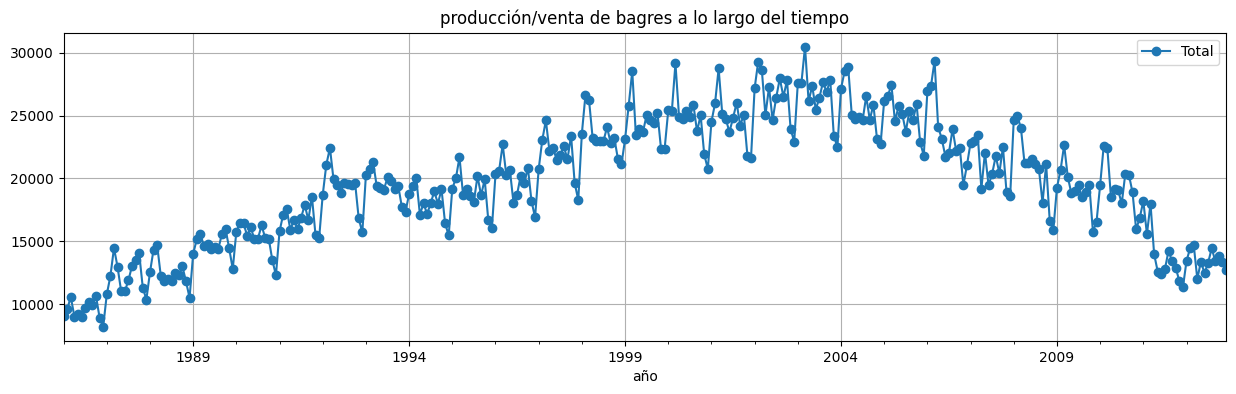

In [215]:

plt.figure(figsize=(15,4))
catfish.plot(marker="o", ax=plt.gca())
plt.title("producción/venta de bagres a lo largo del tiempo")
plt.xlabel("año")
plt.grid(True)

Autocorrelacion
corr(yt,ys) cov(yt, ys) / var(yt) * var(ys) ** 0.5 

cov = 

In [216]:
plot_acf?

Signature:
plot_acf(
    x,
    ax=None,
    lags=None,
    *,
    alpha=0.05,
    use_vlines=True,
    adjusted=False,
    fft=False,
    missing='none',
    title='Autocorrelation',
    zero=True,
    auto_ylims=False,
    bartlett_confint=True,
    vlines_kwargs=None,
    **kwargs,
)
Docstring:
Plot the autocorrelation function

Plots lags on the horizontal and the correlations on vertical axis.

Parameters
----------
x : array_like
    Array of time-series values
ax : AxesSubplot, optional
    If given, this subplot is used to plot in instead of a new figure being
    created.
lags : {int, array_like}, optional
    An int or array of lag values, used on horizontal axis. Uses
    np.arange(lags) when lags is an int.  If not provided,
    ``lags=np.arange(len(corr))`` is used.
alpha : scalar, optional
    If a number is given, the confidence intervals for the given level are
    returned. For instance if alpha=.05, 95 % confidence intervals are
    returned where the standard deviati

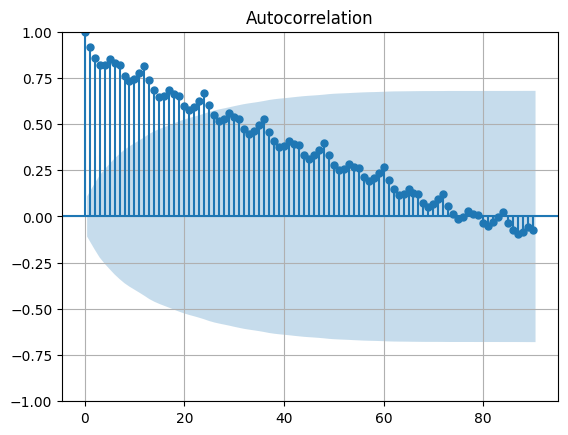

In [219]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(catfish, lags=90)
plt.grid(True)
plt.show()


Se observa que es una serie de tiempo discreta, univariada.

Se observa una autocorrelacion alta. Ciclos con frecuencia determinada cada 12 meses

No es estacionaria.

Tendencia decreciente

No parece seguir un random walk por la estructura de autocorrelación que tiene 



##### BYMA: cotización de la bolsa de valores de Argentina


In [5]:
byma = pd.read_csv(
    "./Datasets/BYMA.csv",  header=0, index_col=0, 
)

byma.fechaHora = pd.to_datetime(byma.fechaHora, infer_datetime_format=True)
byma = byma.set_index("fechaHora")

/var/folders/30/4fg_jqmn6t5bqy5p8vdxjmpr0000gp/T/ipykernel_1178/589893351.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  byma.fechaHora = pd.to_datetime(byma.fechaHora, infer_datetime_format=True)


<Axes: xlabel='fechaHora'>

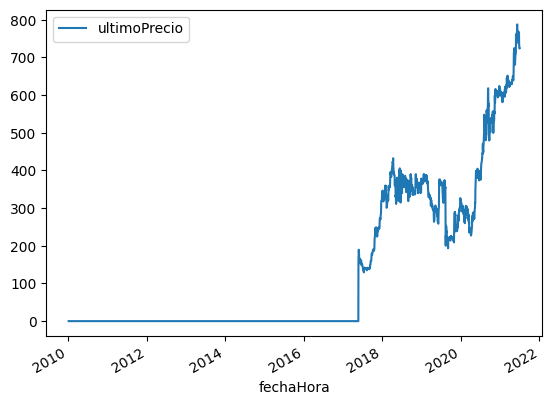

In [7]:
byma.plot()

In [8]:
num_zeros = (byma.ultimoPrecio == 0.0).sum().sum()
num_zeros

1773

In [9]:
# Borramos los que son 0.0
byma = byma[(byma != 0.0).all(axis=1)]
len(byma)

998

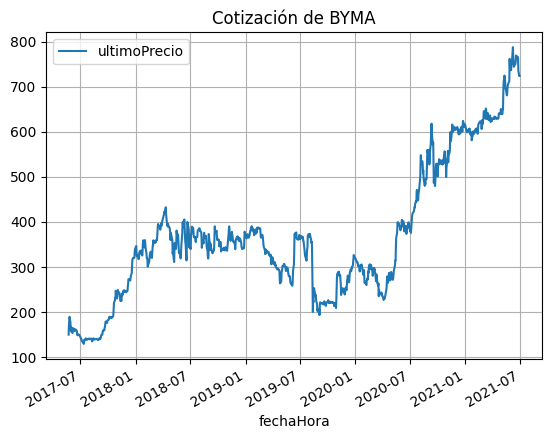

In [10]:
byma.plot()
plt.title("Cotización de BYMA")
plt.grid(True)

Se observa que es una serie de tiempo discreta, univariada, no estacionaria y no estacional.
Se ve una tendencia alcista apartir de julio 2020.
Aparenta segiur un proceso de random walk

#### Estadisticas de temperatura



In [134]:
temp = pd.read_csv("./Datasets/new_estadisticas.txt", sep="\t", encoding="latin-1")

In [144]:
temp

,Estacion,Valor Medio de,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,LA QUIACA OBS.,Temperatura (ï¿½C),12.8,12.5,12.4,10.9,6.9,4.4,4.1,6.7,9.3,11.7,12.8,13.2
1,LA QUIACA OBS.,Temperatura mï¿½xima (ï¿½C),20.1,19.9,19.9,19.7,17.3,15.6,15.4,17.4,19.2,21.1,21.7,21.3
2,LA QUIACA OBS.,Temperatura mï¿½nima (ï¿½C),7.4,7.0,6.3,2.8,-3.0,-6.2,-6.8,-4.2,-1.1,2.8,5.2,6.9
3,LA QUIACA OBS.,Humedad relativa (%),65.3,64.1,62.4,48.2,34.6,31.1,30.1,31.7,34.4,45.3,52.3,59.2
4,LA QUIACA OBS.,Velocidad del Viento (km/h),6.9,7.1,6.5,6.4,6.0,4.9,6.6,6.6,8.6,8.7,8.8,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,BASE SAN MARTï¿½N,Humedad relativa (%),S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D
604,BASE SAN MARTï¿½N,Velocidad del Viento (km/h),14.6,17.7,22.3,20.4,19.3,18.0,17.3,18.9,17.5,20.3,19.2,18.3
605,BASE SAN MARTï¿½N,Nubosidad total (octavos),6.2,6.5,6.3,6.0,5.8,5.2,5.5,5.9,6.3,6.4,6.4,6.2
606,BASE SAN MARTï¿½N,Precipitaciï¿½n (mm),S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D


In [146]:
precipitacion = temp[(temp["Valor Medio de"] == "Precipitaciï¿½n (mm)")]
temperatura_media = temp[(temp["Valor Medio de"] == "Temperatura (ï¿½C)")]
temperatura_maxima = temp[(temp["Valor Medio de"] == "Temperatura mï¿½xima (ï¿½C)")]
temperatura_minima = temp[(temp["Valor Medio de"] == "Temperatura mï¿½nima (ï¿½C)")]
humedad_relativa = temp[(temp["Valor Medio de"] == "Humedad relativa (%)")]
velocidad_viento = temp[(temp["Valor Medio de"] == "Velocidad del Viento (km/h)")]
nubosidad_total = temp[(temp["Valor Medio de"] == "Nubosidad total (octavos)")]
frecuencia_precipitacion = temp[(temp["Valor Medio de"] == "Frecuencia de dï¿½as con Precipitaciï¿½n superior a 0.1 mm")]

In [148]:
temperatura_media

,Estacion,Valor Medio de,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,LA QUIACA OBS.,Temperatura (ï¿½C),12.8,12.5,12.4,10.9,6.9,4.4,4.1,6.7,9.3,11.7,12.8,13.2
8,ORï¿½N AERO,Temperatura (ï¿½C),S/D,25.1,23.9,20.9,17.7,15.0,14.7,17.2,20.1,23.8,25.0,26.0
16,TARTAGAL AERO,Temperatura (ï¿½C),25.2,24.4,S/D,20.2,17.2,14.9,14.6,17.4,20.2,23.9,24.6,25.3
24,JUJUY AERO,Temperatura (ï¿½C),23.6,22.5,21.4,18.3,14.8,12.2,11.9,15.0,17.8,21.7,23.0,23.8
32,SALTA AERO,Temperatura (ï¿½C),21.4,20.3,19.5,16.6,13.1,10.6,10.1,12.7,15.1,19.1,20.5,21.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,BASE ESPERANZA,Temperatura (ï¿½C),1.4,0.7,-2.3,-6.1,-8.2,-10.4,-10.5,-9.0,-6.5,-4.3,-1.1,0.8
576,BASE ORCADAS,Temperatura (ï¿½C),1.4,1.4,0.4,-1.8,-4.6,-7.9,-9.3,-7.8,-5.4,-2.8,-0.7,0.6
584,BASE BELGRANO II,Temperatura (ï¿½C),-2.4,-7.0,-12.0,-16.7,-18.1,-19.1,-20.4,-20.2,-18.4,-14.8,-8.0,-3.0
592,BASE MARAMBIO,Temperatura (ï¿½C),-0.8,-2.0,-6.1,-10.8,-12.8,-14.7,-14.7,-13.1,-10.1,-7.6,-3.6,-1.2


In [150]:
for col in temp.columns[2:]:
    temp[col] = pd.to_numeric(temp[col], errors="coerce")

In [64]:
temp.fillna(np.nan, inplace=True)

In [156]:
precipitacion.columns[2:]

Index(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct',
       'Nov', 'Dic'],
      dtype='object')

In [157]:
for col in precipitacion.columns[2:]:
    precipitacion[col] = pd.to_numeric(precipitacion[col], errors="coerce")

/var/folders/30/4fg_jqmn6t5bqy5p8vdxjmpr0000gp/T/ipykernel_1178/1059264219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precipitacion[col] = pd.to_numeric(precipitacion[col], errors="coerce")


In [159]:
precipitacion.fillna(np.nan, inplace=True)

/var/folders/30/4fg_jqmn6t5bqy5p8vdxjmpr0000gp/T/ipykernel_1178/2175131421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precipitacion.fillna(np.nan, inplace=True)


In [180]:
precipitacion

,Estacion,Valor Medio de,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
6,LA QUIACA OBS.,Precipitaciï¿½n (mm),97.5,68.4,55.9,8.2,1.0,0.5,0.0,1.4,3.5,16.0,27.3,71.9
14,ORï¿½N AERO,Precipitaciï¿½n (mm),216.6,183.7,184.2,70.9,19.8,6.3,4.5,5.4,16.3,60.0,108.1,170.1
22,TARTAGAL AERO,Precipitaciï¿½n (mm),200.2,182.8,187.7,65.3,22.0,6.7,3.6,5.1,15.1,45.0,110.0,176.4
30,JUJUY AERO,Precipitaciï¿½n (mm),153.2,152.9,138.9,49.4,11.6,2.8,3.4,3.1,5.4,28.1,61.1,130.4
38,SALTA AERO,Precipitaciï¿½n (mm),192.6,154.2,110.6,33.0,8.0,1.5,3.9,3.8,7.6,25.1,62.2,145.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,BASE ESPERANZA,Precipitaciï¿½n (mm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582,BASE ORCADAS,Precipitaciï¿½n (mm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590,BASE BELGRANO II,Precipitaciï¿½n (mm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,BASE MARAMBIO,Precipitaciï¿½n (mm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

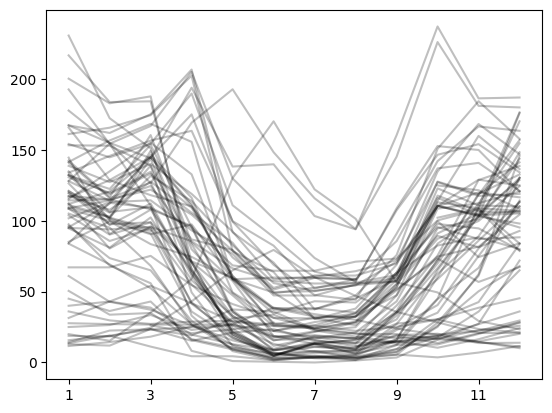

In [206]:
precipitacion.columns = ["est", "val", 1,2,3,4,5,6,7,8,9,10,11,12]
precipitacion.T[2:].plot(color="k", legend=False, alpha=0.25)

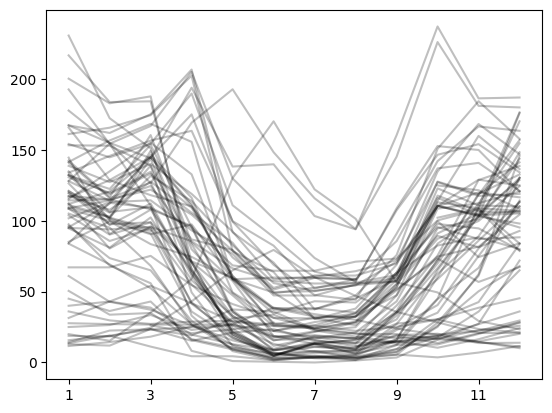

In [197]:
precipitacion.columns = ["est", "val", 1,2,3,4,5,6,7,8,9,10,11,12]
for i in range(len(precipitacion)):
    precipitacion.iloc[i][2:].plot(color="k", alpha=0.25)

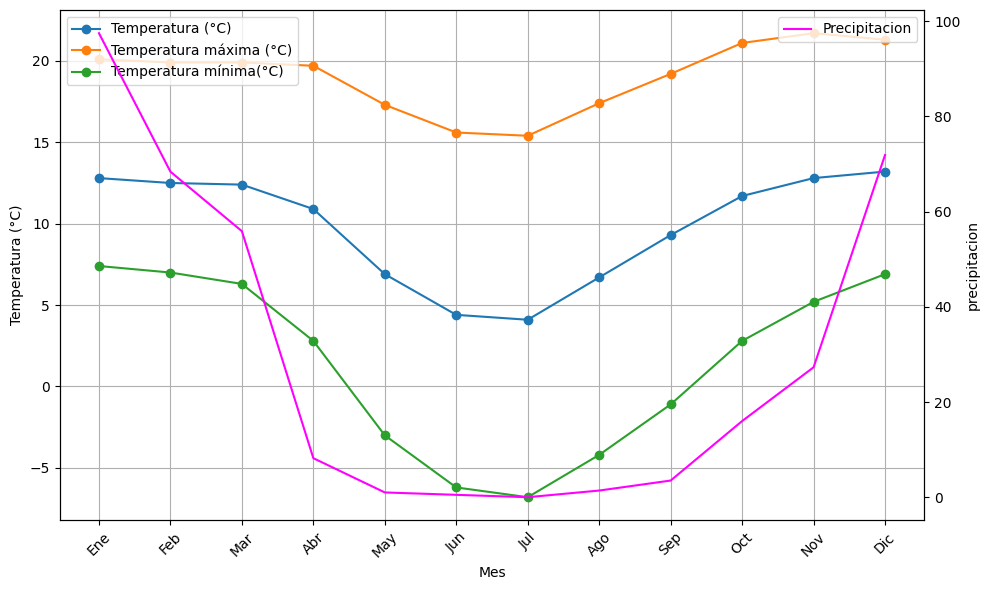

In [122]:
fig, ax1 = plt.subplots(figsize=(10,6))

# temperatura
ax1.plot(temp.columns[2:], temp.iloc[0, 2:], marker='o', label='Temperatura (°C)')
ax1.plot(temp.columns[2:], temp.iloc[1, 2:], marker='o', label='Temperatura máxima (°C)')
ax1.plot(temp.columns[2:], temp.iloc[2, 2:], marker='o', label='Temperatura mínima(°C)')

ax1.set_xlabel('Mes')
ax1.set_ylabel('Temperatura (°C)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)
ax1.legend(loc = "upper left")
#plt.tight_layout()
#plt.title('Temperatura media, máxima y minima - LA QUIACA')

ax2 = ax1.twinx()
ax2.plot(temp.columns[2:], temp.iloc[6,2:], label="Precipitacion", color="magenta")
ax2.set_ylabel("precipitacion")
ax2.legend(loc="upper right")
plt.tight_layout()


plt.show()